# Case Timeline Plot

##### Supplementary code for Faletti et al. (2026): _Using Ensemble Sensitivity to Diagnose Environmental Modulation of Mesocyclone Intensity in the Warn-on-Forecast System_

### Reproduces Fig. 1

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import lines
import matplotlib.colors as mcolors
import numpy as np
import datetime

from wofunits import wofunits

## Manually define plotting and timeline specs

In [3]:
# Save plot?
save = False 

# Plot save path
outplot_path = wofunits.paths['outplot_path']


# Define times to highlight for each case (21, 22 UTC 17 May; 20 May; 26 May; 28 May)

init_times = [datetime.datetime(2019,5,17,21,0), datetime.datetime(2019,5,17,22,0),
              datetime.datetime(2019,5,17,20,30), datetime.datetime(2019,5,17,20,0),
              datetime.datetime(2019,5,17,22,30)]

esa_times = [datetime.datetime(2019,5,17,22,30), datetime.datetime(2019,5,17,23,0),
              datetime.datetime(2019,5,17,21,0), datetime.datetime(2019,5,17,20,30),
              datetime.datetime(2019,5,17,23,30)]

window_times = [datetime.datetime(2019,5,17,23,30), datetime.datetime(2019,5,18,0,0),
              datetime.datetime(2019,5,17,22,0), datetime.datetime(2019,5,17,21,0),
              datetime.datetime(2019,5,18,0,30)]

resp_times = [datetime.datetime(2019,5,18,0,30), datetime.datetime(2019,5,18,0,30),
              datetime.datetime(2019,5,17,22,30), datetime.datetime(2019,5,17,21,30),
              datetime.datetime(2019,5,18,1,0)]

## Plot Fig. 1: Case Timelines

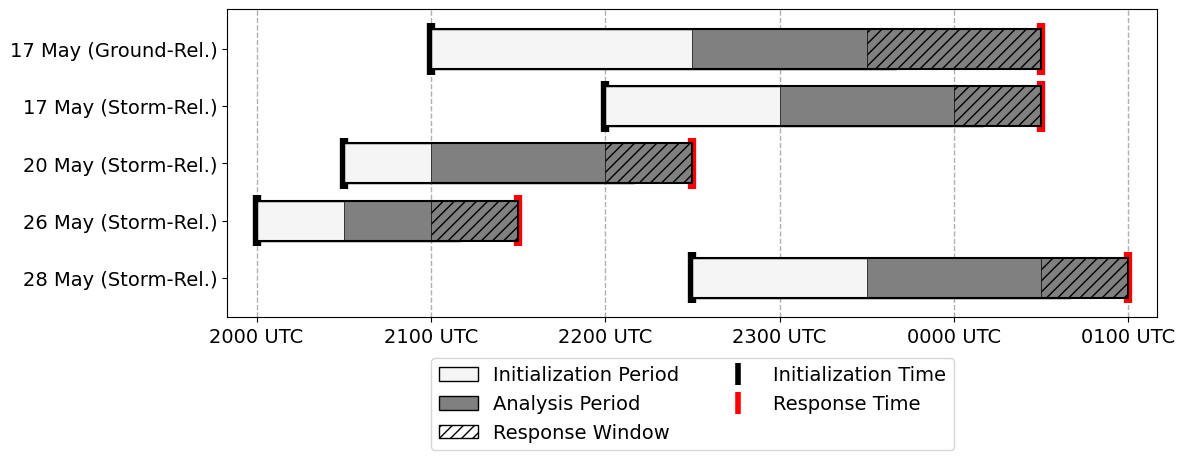

In [4]:
fig, ax = plt.subplots(figsize=(12,4))
for i in range(1,6):
    
    # init to response bounds
    x0, x1 = init_times[i-1], resp_times[i-1]
    rect = mpatches.Rectangle((x0, i - 0.35), x1 - x0, height=0.7, lw=1.5, edgecolor='black', facecolor='none', zorder=999)
    ax.add_patch(rect)
    
    x0, x1 = init_times[i-1], init_times[i-1]
    rect = mpatches.Rectangle((x0, i - 0.45), x1 - x0, height=0.9, lw=6, edgecolor='black', facecolor='none', zorder=1)
    ax.add_patch(rect)
    
        # init to response bounds
    x0, x1 = init_times[i-1], window_times[i-1]+datetime.timedelta(minutes=10)
    rect = mpatches.Rectangle((x0, i - 0.35), x1 - x0, height=0.7, lw=1, edgecolor='black', facecolor='whitesmoke')
    ax.add_patch(rect)
    
        # analysis period begin to response bounds
    x0, x1 = esa_times[i-1], resp_times[i-1]
    rect = mpatches.Rectangle((x0, i - 0.35), x1 - x0, height=0.7, lw=0.5, edgecolor='black', facecolor='gray', zorder=2)
    ax.add_patch(rect)
    
        # response window begin to response bounds
    x0, x1 = window_times[i-1], resp_times[i-1]
    rect = mpatches.Rectangle((x0, i - 0.35), x1 - x0, height=0.7, lw=0.5, edgecolor='black', facecolor='none', hatch='///', zorder=2)
    ax.add_patch(rect)
    
    x0, x1 = resp_times[i-1], resp_times[i-1]
    rect = mpatches.Rectangle((x0, i - 0.45), x1 - x0, height=0.9, lw=6, edgecolor='r', facecolor='none', zorder=1)
    ax.add_patch(rect)
    
ax.set_aspect('auto')
ax.use_sticky_edges = False
ax.autoscale(enable=True, tight=False)
ax.grid(axis='x', ls='--', lw=1, alpha=1)
ax.set_axisbelow(True)
ax.set_yticks([1,2,3,4,5])
#ax.set_ylim(-10, 10)
ax.set_xlim(datetime.datetime(2019,5,17,19,50), datetime.datetime(2019,5,18,1,10))
ax.set_xticks(np.arange(datetime.datetime(2019,5,17,20), datetime.datetime(2019,5,18,2), datetime.timedelta(hours=1)))
ax.set_xticklabels(['2000 UTC', '2100 UTC', '2200 UTC', '2300 UTC', '0000 UTC', '0100 UTC'], size=14)
ax.set_yticklabels(['17 May (Ground-Rel.)',
                    '17 May (Storm-Rel.)',
                    '20 May (Storm-Rel.)',
                    '26 May (Storm-Rel.)',
                    '28 May (Storm-Rel.)'], size=14)
ax.invert_yaxis()


inittime_rect = mpatches.Rectangle((x0, i - 0.45), x1 - x0, height=0.9, lw=1, edgecolor='k', facecolor='whitesmoke', zorder=1)
resptime_rect = mpatches.Rectangle((x0, i - 0.45), x1 - x0, height=0.9, lw=1, edgecolor='k', facecolor='gray', zorder=1)
respwindow_rect = mpatches.Rectangle((x0, i - 0.45), x1 - x0, height=0.9, lw=1, edgecolor='k', facecolor='none', hatch='///', zorder=1)
init_bar = lines.Line2D([], [], color='k', marker='|', ls='None',
                          markersize=16, markeredgewidth=4, label='Vertical line')
resp_bar = lines.Line2D([], [], color='r', marker='|', ls='None',
                          markersize=16, markeredgewidth=4, label='Vertical line')

ax.legend(handles=[inittime_rect, resptime_rect, respwindow_rect,init_bar,resp_bar], 
          labels=['Initialization Period', 'Analysis Period', 'Response Window', 'Initialization Time','Response Time'],
          loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, ncol=2, fontsize=14)


if save == True:
    plt.savefig(fname=f'{outplot_path}/case_timelines.png', dpi=300, bbox_inches='tight', facecolor='w')